In [1]:
%matplotlib inline

In [2]:
%run ~/src/starry/notebooks/notebook_setup.py

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import starry_process
import starry

In [38]:
ydeg = 20
gp = starry_process.YlmGP(ydeg)
map = starry.Map(ydeg, lazy=False)

Pre-computing some matrices... Done.


In [39]:
gp.size.set_params(0.01, 0.01)
gp.latitude.set_params(0.5, 0.01)
gp.contrast.set_params(-5, 0.01)
ylm = gp.draw(5)

Compiling `render`... Done.


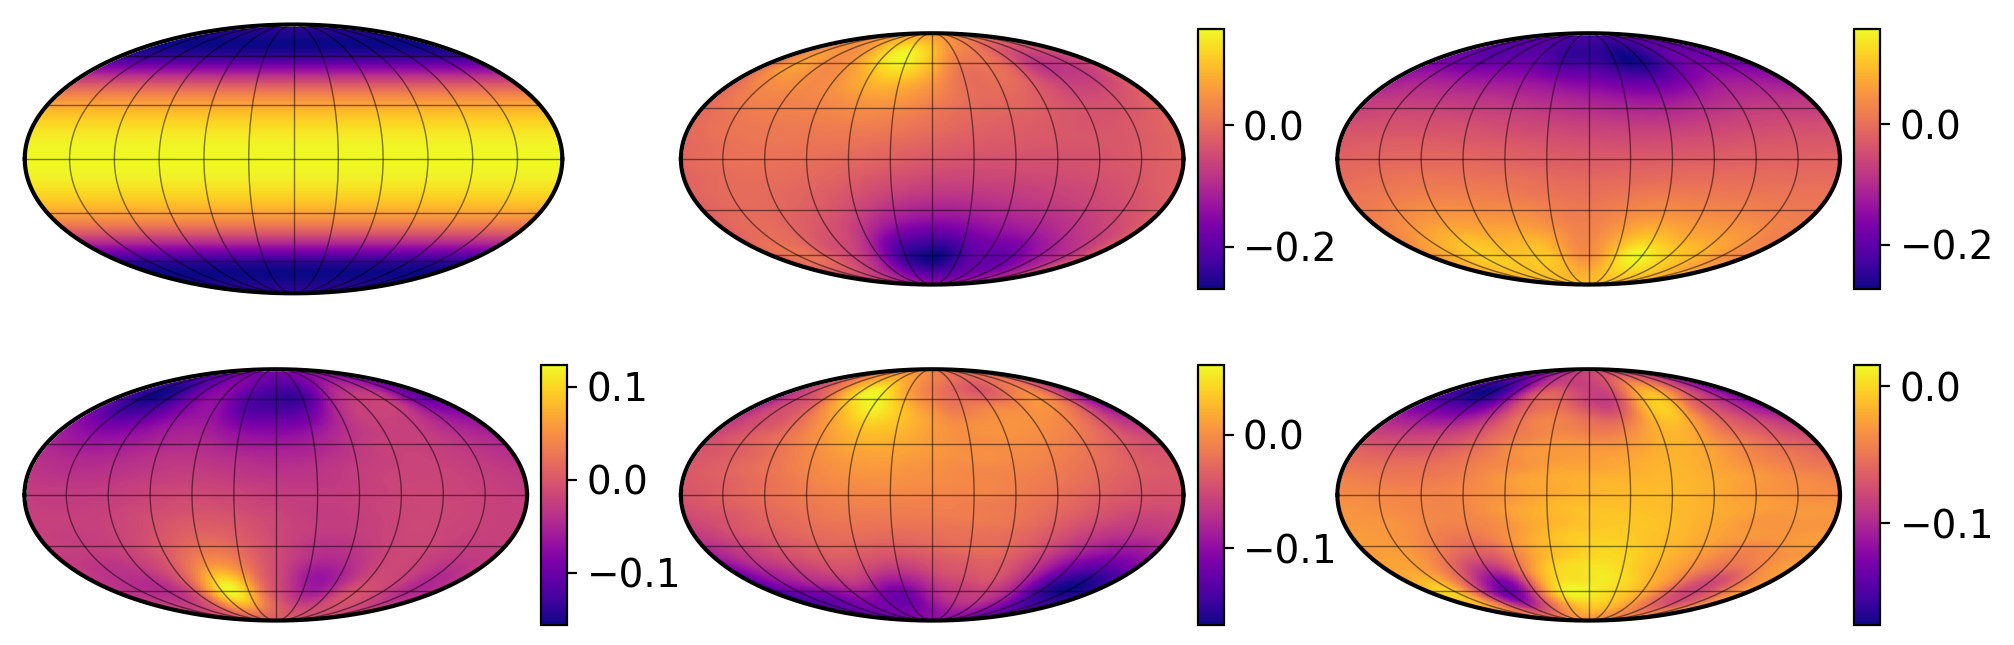

In [40]:
fig, ax = plt.subplots(2, 3)
map[:, :] = gp.mean
map.show(ax=ax.flatten()[0], projection="moll")
for i in range(5):
    map[:, :] = ylm[i]
    map.show(ax=ax.flatten()[i + 1], projection="moll", colorbar=True)

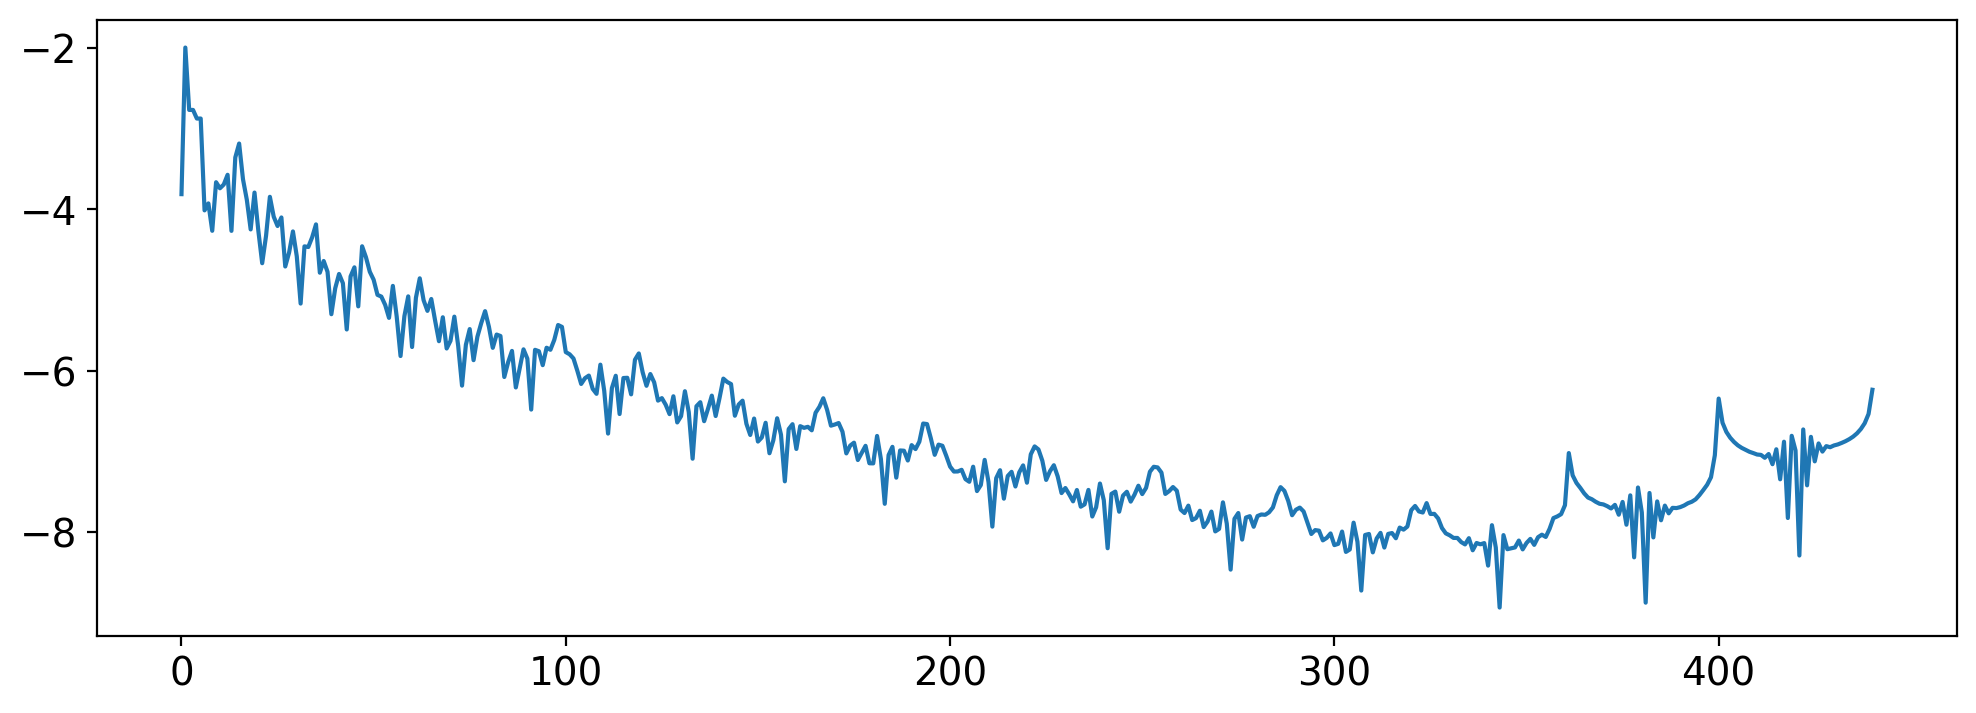

In [41]:
# Diagonal of covariance; should decay exponentially
plt.plot(np.diag(np.log10(np.abs(gp.cov))));

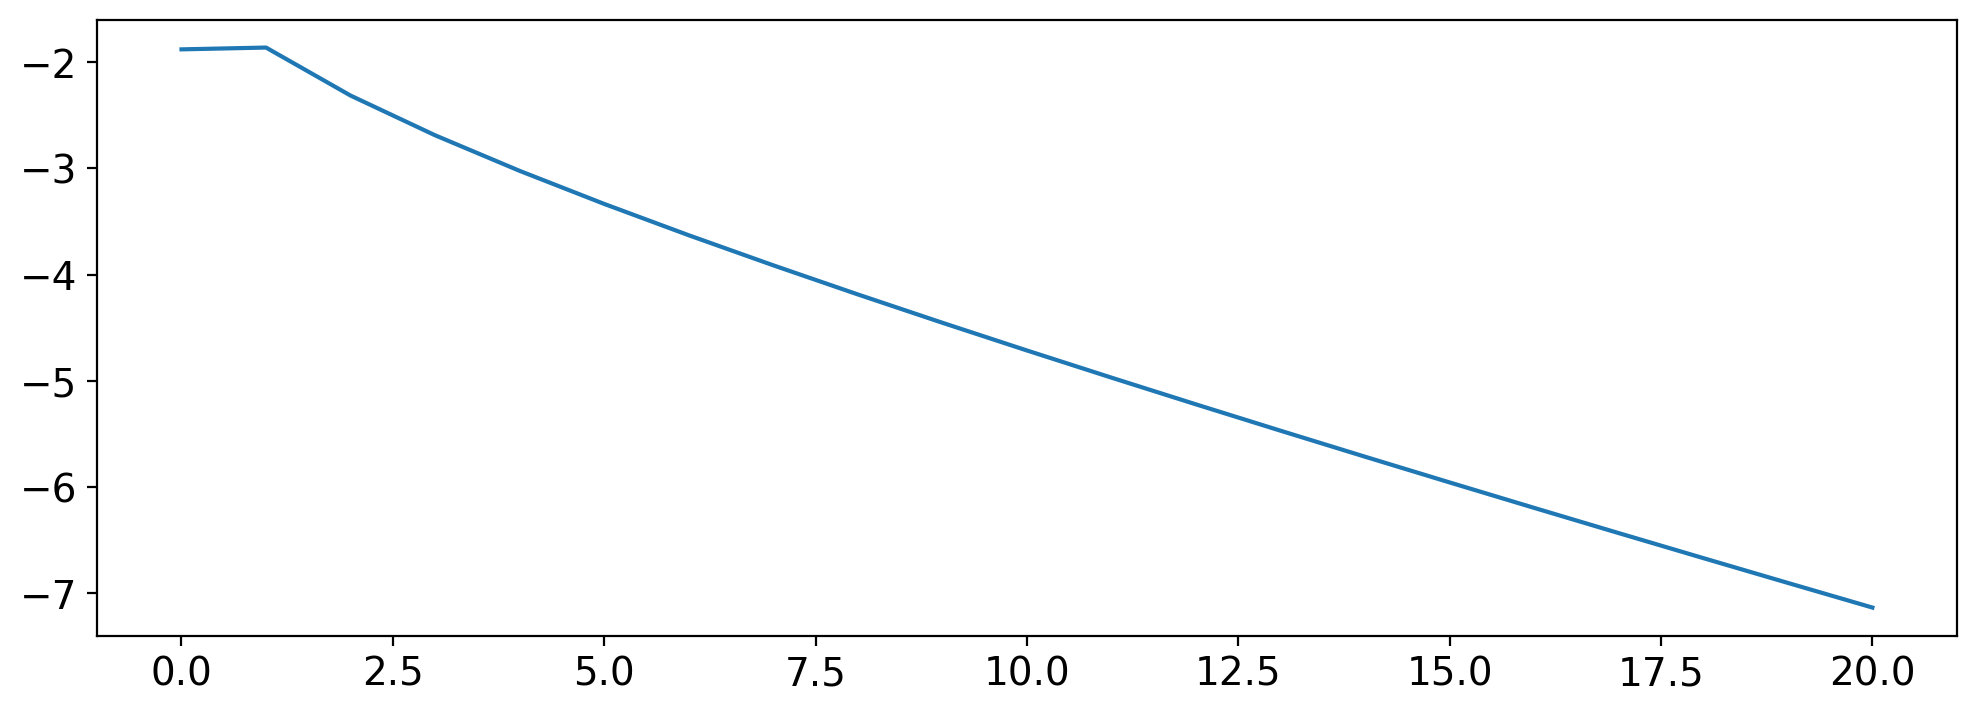

In [42]:
# Diagonal of size covariance; should decay exponentially
eigE = gp.size._eigE[gp.size.ij]
C = eigE @ eigE.T
plt.plot(np.log10(np.abs(np.diag(np.abs(C)))));

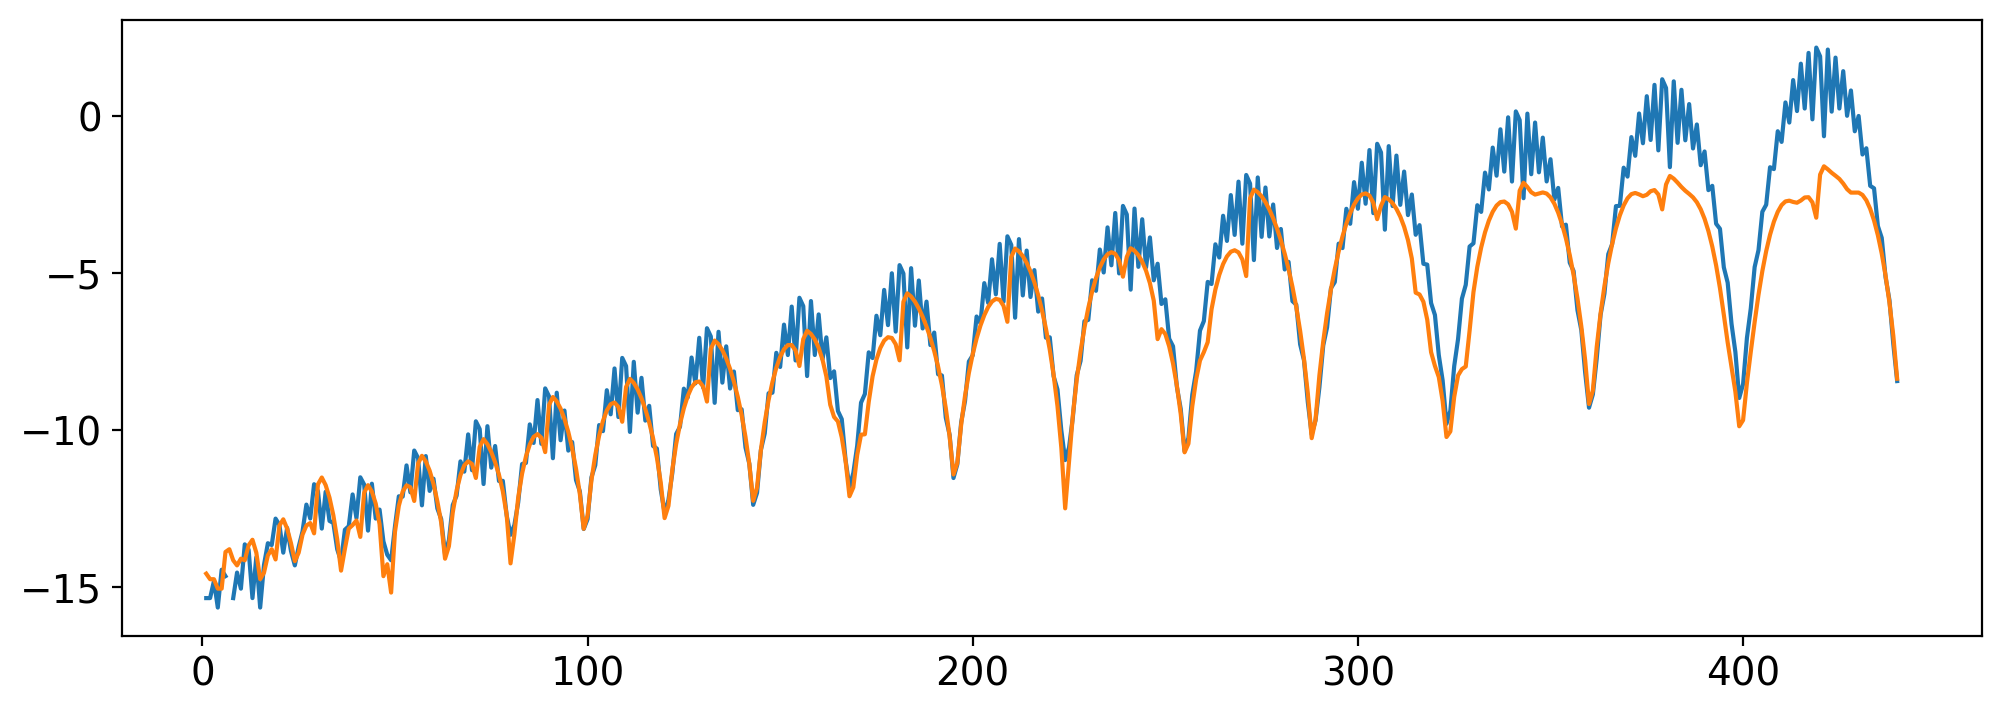

In [43]:
# Difference between the diagonal of the integral of Rx Rx^T and one
# Should be exactly zero
eigE = gp.latitude._second_moment(np.eye((gp.ydeg + 1) ** 2))
C = eigE @ eigE.T
plt.plot(np.log10(np.abs(np.diag(np.abs(C)) - 1)));

# Difference between the diagonal of the integral of Ry Ry^T and one
# Should be exactly zero
eigE = gp.longitude._second_moment(np.eye((gp.ydeg + 1) ** 2))
C = eigE @ eigE.T
plt.plot(np.log10(np.abs(np.diag(np.abs(C)) - 1)));